In [13]:
import numpy as np
import matplotlib.pyplot as plt
import x_spins
import green2k

In [14]:
sp_ops = x_spins.make_spin_ops()
sz = sp_ops['Sz']
sp = sp_ops['S+']
sm = sp_ops['S-']
s0 = sp_ops['I']

In [15]:
L = 8
hamil = np.zeros((2**L, 2**L))
for i in range(L):
    szsz = [sz, sz] + [s0] * (L - 2)
    spsm = [sp, sm] + [s0] * (L - 2)
    smsp = [sm, sp] + [s0] * (L - 2)
    hamil += x_spins.make_matrix(szsz[i:] + szsz[:i]) + (x_spins.make_matrix(
        spsm[i:] + spsm[:i]) + x_spins.make_matrix(smsp[i:] + smsp[:i])) / 2.0

In [26]:
Gijs = []
omegamax = 5
omegamesh = 40
for iomega in range(omegamesh):
    print("%d/%d"%(iomega, omegamesh))
    Gijs_axis0 = []
    for j in range(L):
        omega = iomega / omegamesh * omegamax
        Gij = x_spins.make_Gij(hamil, L, 0, j, omega)
        Gijs_axis0.append(Gij)
    Gijs.append(Gijs_axis0)
Gijs = np.array(Gijs)
np.save('Gijs.npy', Gijs)

0/40
1/40
2/40
3/40
4/40
5/40
6/40
7/40
8/40
9/40
10/40
11/40
12/40
13/40
14/40
15/40
16/40
17/40
18/40
19/40
20/40
21/40
22/40
23/40
24/40
25/40
26/40
27/40
28/40
29/40
30/40
31/40
32/40
33/40
34/40
35/40
36/40
37/40
38/40
39/40


In [27]:
Gijs = np.load('Gijs.npy')

In [28]:
xs = [i for i in range(L)]
omegas = [iomega / omegamesh * omegamax for iomega in range(omegamesh)]

/tmp/ipykernel_61276/3017700837.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


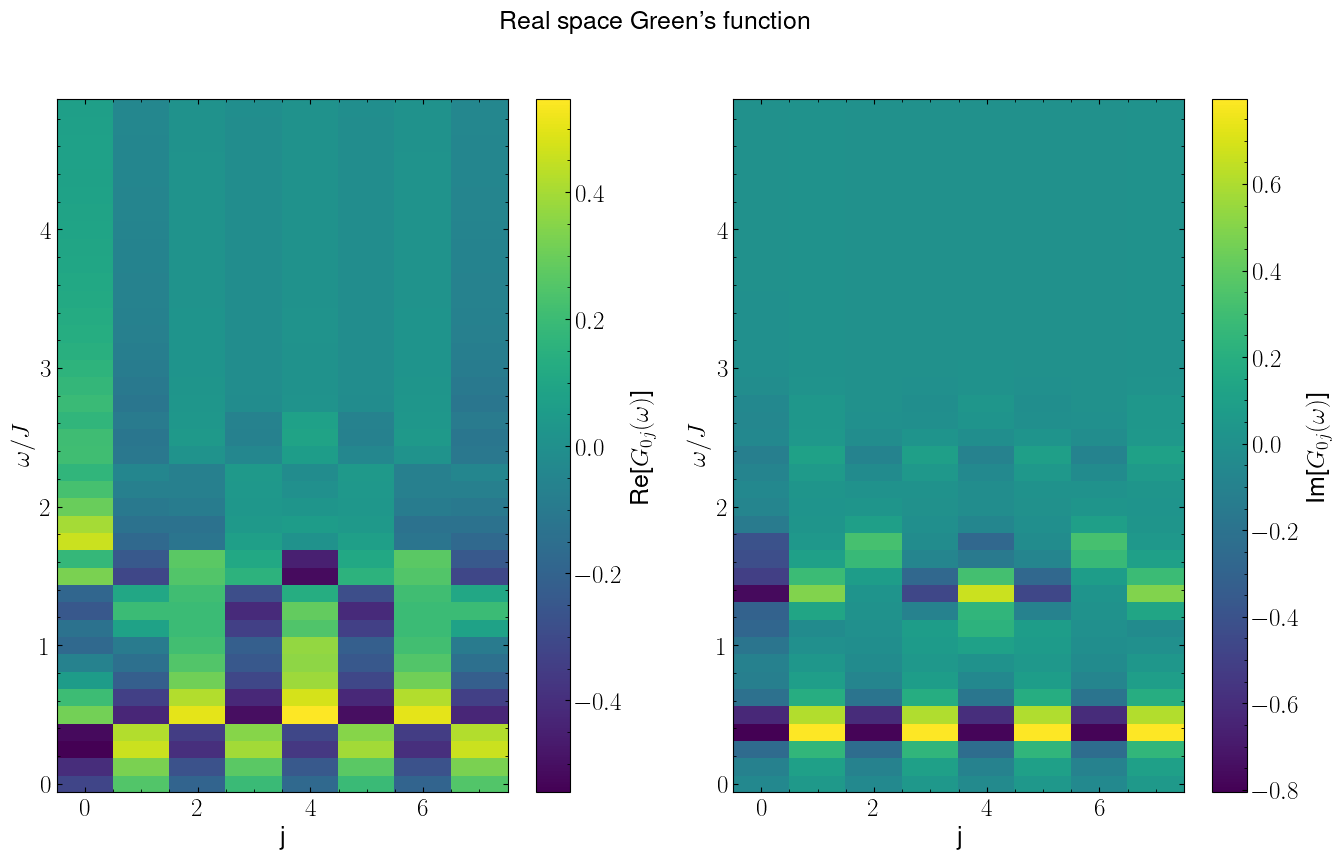

In [32]:
fig, axs = plt.subplots(1,2,figsize=(16,9))
mappable0 = axs[0].pcolor(xs, omegas, Gijs.real)
mappable1 = axs[1].pcolor(xs, omegas, Gijs.imag)
fig.colorbar(mappable0,label='Re[$G_{0j}(\omega)$]')
fig.colorbar(mappable1,label='Im[$G_{0j}(\omega)$]')
axs[0].set_xlabel('j')
axs[0].set_ylabel('$\omega/J$')
axs[1].set_xlabel('j')
axs[1].set_ylabel('$\omega/J$')
fig.suptitle("Real space Green's function")
fig.show()

In [30]:
ks = [np.pi*(2*ik/L) for ik in range(L+1)]
Gkomegas = green2k.make_Gkomega(Gijs,ks)

/tmp/ipykernel_61276/3778812729.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


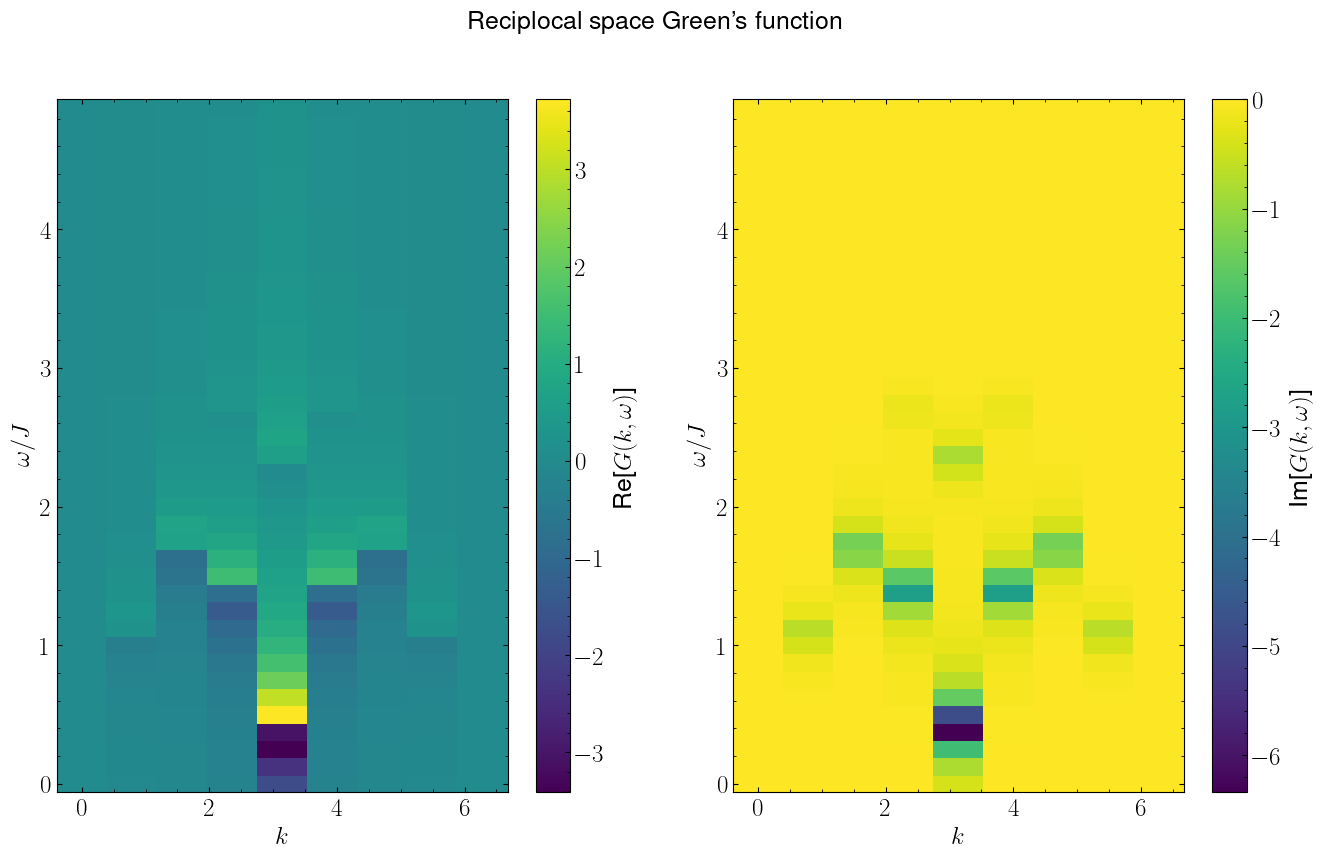

In [33]:
fig, axs = plt.subplots(1,2,figsize=(16,9))
mappable0 = axs[0].pcolor(ks, omegas, Gkomegas.real)
mappable1 = axs[1].pcolor(ks, omegas, Gkomegas.imag)
fig.colorbar(mappable0,label='Re[$G(k,\omega)$]')
fig.colorbar(mappable1,label='Im[$G(k,\omega)$]')
axs[0].set_xlabel('$k$')
axs[0].set_ylabel('$\omega/J$')
axs[1].set_xlabel('$k$')
axs[1].set_ylabel('$\omega/J$')
fig.suptitle("Reciplocal space Green's function")
fig.show()